In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print("seed",seed)
print(datetime.datetime.now())

seed 0
2023-07-09 01:25:17.841602


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(-1442.9165)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(4.6900)tensor(6.1079)tensor(4.1276)tensor(4.1013)tensor(4.4906)tensor(2.5680)tensor(8.0446)tensor(3.2530)tensor(3.3295)tensor(3.4284)tensor(5.5379)tensor(3.0737)tensor(3.4741)tensor(7.8857)tensor(3.6484)tensor(3.9607)tensor(6.1841)tensor(2.9183)tensor(3.8949)tensor(4.3200)tensor(7.4749)tensor(4.2907)tensor(5.9571)tensor(5.1442)tensor(7.9371)tensor(7.2518)tensor(6.4385)tensor(6.4795)tensor(6.6592)tensor(7.8993)tensor(6.6127)tensor(6.7525)tensor(7.6070)tensor(6.9687)tensor(4.8691)tensor(4.2715)tensor(8.2019)tensor(7.0312)tensor(5.2863)tensor(5.8623)tensor(3.0883)tensor(5.3527)tensor(5.6772)tensor(4.3206)tensor(5.0136)tensor(4.6793)tensor(8.6648)tensor(10.1536)tensor(10.9895)tensor(7.2449)tensor(2.8375)tensor(4.2353)tensor(4.9647)tensor(4.3102)tensor(5.8498)tensor(5.7911)tensor(4.5322)tensor(4.4600)tensor(5.9349)tensor(7.2624)tensor(3.1342)tensor(4.8476)tensor(5.6634)tensor(7.2108)tensor(5.7909)tensor(3.6229)tensor(3.1749)tensor(3.4075)tensor(3.1937)tensor(6.2585)tensor(3.1958)tens

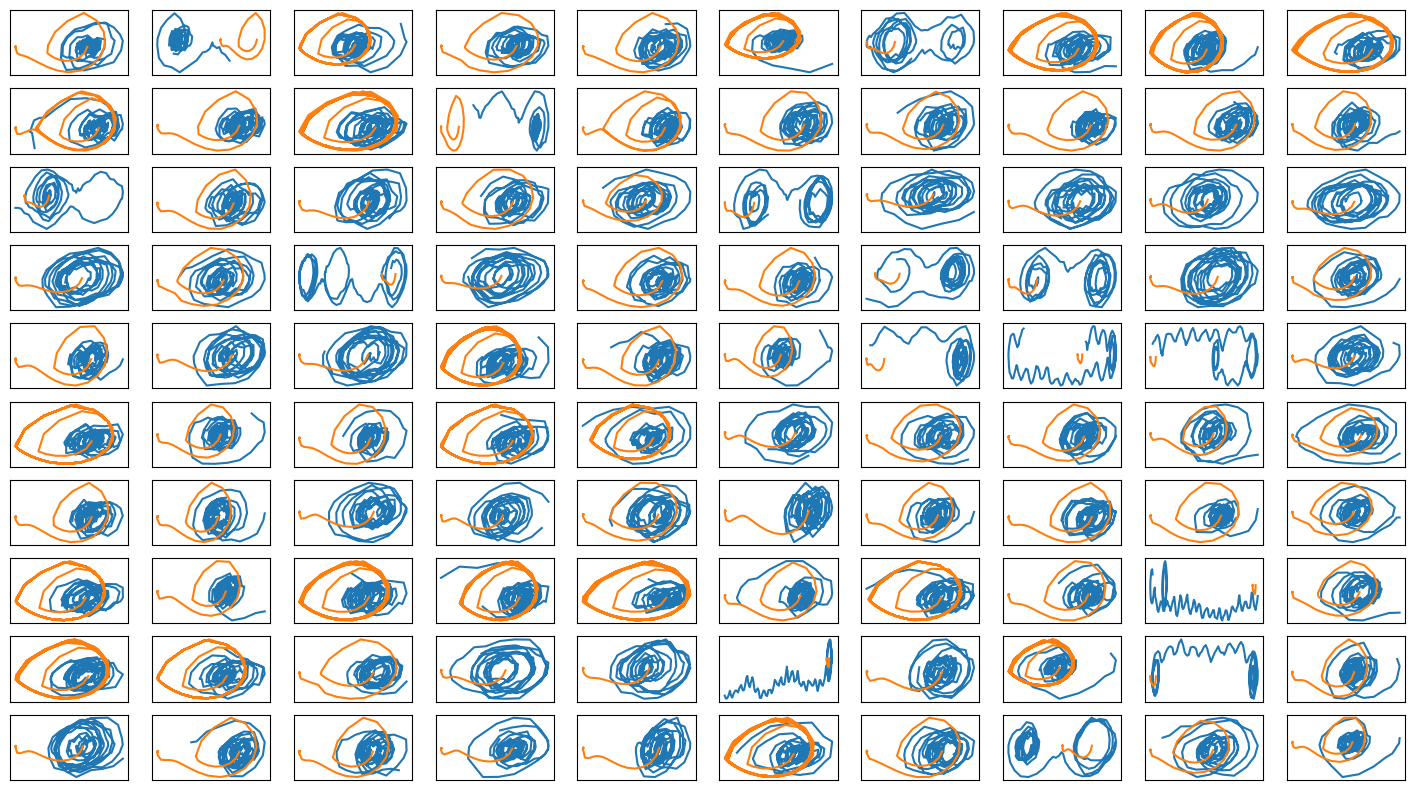

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 97059.74253  validloss 541.35449±0.00000  bestvalidloss 541.35449  last_update 0
train: iter 1  trainloss 966.28652  validloss 488.60885±0.00000  bestvalidloss 488.60885  last_update 0
train: iter 2  trainloss 778.82647  validloss 480.12709±0.00000  bestvalidloss 480.12709  last_update 0
train: iter 3  trainloss 678.81578  validloss 475.38855±0.00000  bestvalidloss 475.38855  last_update 0
train: iter 4  trainloss 627.71385  validloss 458.83517±0.00000  bestvalidloss 458.83517  last_update 0
train: iter 5  trainloss 598.21301  validloss 446.34613±0.00000  bestvalidloss 446.34613  last_update 0
train: iter 6  trainloss 553.41671  validloss 434.84271±0.00000  bestvalidloss 434.84271  last_update 0
train: iter 7  trainloss 530.36028  validloss 422.45268±0.00000  bestvalidloss 422.45268  last_update 0
train: iter 8  trainloss 513.75242  validloss 408.88931±0.00000  bestvalidloss 408.88931  last_update 0
train: iter 9  trainloss 522.44326  validlo

train: iter 80  trainloss -54.52633  validloss -113.05854±0.00000  bestvalidloss -113.05854  last_update 0
train: iter 81  trainloss -20.67725  validloss -149.27388±0.00000  bestvalidloss -149.27388  last_update 0
train: iter 82  trainloss -72.24846  validloss -144.64151±0.00000  bestvalidloss -149.27388  last_update 1
train: iter 83  trainloss -90.38741  validloss -166.22203±0.00000  bestvalidloss -166.22203  last_update 0
train: iter 84  trainloss -105.64434  validloss -174.86179±0.00000  bestvalidloss -174.86179  last_update 0
train: iter 85  trainloss -135.05695  validloss -219.78277±0.00000  bestvalidloss -219.78277  last_update 0
train: iter 86  trainloss -100.81797  validloss -232.82924±0.00000  bestvalidloss -232.82924  last_update 0
train: iter 87  trainloss -134.90802  validloss -196.28887±0.00000  bestvalidloss -232.82924  last_update 1
train: iter 88  trainloss -155.83956  validloss -170.70359±0.00000  bestvalidloss -232.82924  last_update 2
train: iter 89  trainloss -175.6

train: iter 157  trainloss -564.78988  validloss -594.70852±0.00000  bestvalidloss -614.92097  last_update 9
train: iter 158  trainloss -582.37654  validloss -618.68478±0.00000  bestvalidloss -618.68478  last_update 0
train: iter 159  trainloss -569.49452  validloss -639.54688±0.00000  bestvalidloss -639.54688  last_update 0
train: iter 160  trainloss -576.47872  validloss -617.08676±0.00000  bestvalidloss -639.54688  last_update 1
train: iter 161  trainloss -588.93414  validloss -627.78330±0.00000  bestvalidloss -639.54688  last_update 2
train: iter 162  trainloss -589.59785  validloss -658.47237±0.00000  bestvalidloss -658.47237  last_update 0
train: iter 163  trainloss -542.98419  validloss -610.37690±0.00000  bestvalidloss -658.47237  last_update 1
train: iter 164  trainloss -543.14462  validloss -604.38483±0.00000  bestvalidloss -658.47237  last_update 2
train: iter 165  trainloss -572.56544  validloss -607.80556±0.00000  bestvalidloss -658.47237  last_update 3
train: iter 166  tr

train: iter 233  trainloss -557.21531  validloss -613.49593±0.00000  bestvalidloss -685.74642  last_update 17
train: iter 234  trainloss -566.54087  validloss -611.57526±0.00000  bestvalidloss -685.74642  last_update 18
train: iter 235  trainloss -579.58089  validloss -614.94804±0.00000  bestvalidloss -685.74642  last_update 19
train: iter 236  trainloss -552.35133  validloss -641.04831±0.00000  bestvalidloss -685.74642  last_update 20
train: iter 237  trainloss -571.29854  validloss -617.16874±0.00000  bestvalidloss -685.74642  last_update 21
train: iter 238  trainloss -585.74609  validloss -635.49838±0.00000  bestvalidloss -685.74642  last_update 22
train: iter 239  trainloss -593.25918  validloss -662.27070±0.00000  bestvalidloss -685.74642  last_update 23
train: iter 240  trainloss -599.24869  validloss -637.28639±0.00000  bestvalidloss -685.74642  last_update 24
train: iter 241  trainloss -601.75387  validloss -653.21374±0.00000  bestvalidloss -685.74642  last_update 25
train: ite

train: iter 308  trainloss -648.94480  validloss -653.31514±0.00000  bestvalidloss -721.21710  last_update 36
train: iter 309  trainloss -654.18027  validloss -743.25605±0.00000  bestvalidloss -743.25605  last_update 0
train: iter 310  trainloss -656.87277  validloss -718.13137±0.00000  bestvalidloss -743.25605  last_update 1
train: iter 311  trainloss -616.53803  validloss -739.49917±0.00000  bestvalidloss -743.25605  last_update 2
train: iter 312  trainloss -642.84726  validloss -695.55452±0.00000  bestvalidloss -743.25605  last_update 3
train: iter 313  trainloss -649.26669  validloss -685.23546±0.00000  bestvalidloss -743.25605  last_update 4
train: iter 314  trainloss -647.68396  validloss -718.17142±0.00000  bestvalidloss -743.25605  last_update 5
train: iter 315  trainloss -657.28848  validloss -698.25622±0.00000  bestvalidloss -743.25605  last_update 6
train: iter 316  trainloss -582.65955  validloss -664.29278±0.00000  bestvalidloss -743.25605  last_update 7
train: iter 317  t

train: iter 383  trainloss -627.08026  validloss -629.00504±0.00000  bestvalidloss -747.61373  last_update 41
train: iter 384  trainloss -634.82418  validloss -712.35803±0.00000  bestvalidloss -747.61373  last_update 42
train: iter 385  trainloss -650.83375  validloss -700.58290±0.00000  bestvalidloss -747.61373  last_update 43
train: iter 386  trainloss -667.20353  validloss -735.51589±0.00000  bestvalidloss -747.61373  last_update 44
train: iter 387  trainloss -657.02135  validloss -753.02001±0.00000  bestvalidloss -753.02001  last_update 0
train: iter 388  trainloss -674.68094  validloss -725.37581±0.00000  bestvalidloss -753.02001  last_update 1
train: iter 389  trainloss -623.47358  validloss -709.31942±0.00000  bestvalidloss -753.02001  last_update 2
train: iter 390  trainloss -654.89652  validloss -649.78008±0.00000  bestvalidloss -753.02001  last_update 3
train: iter 391  trainloss -670.40304  validloss -711.44934±0.00000  bestvalidloss -753.02001  last_update 4
train: iter 392

train: iter 458  trainloss -672.82149  validloss -783.86028±0.00000  bestvalidloss -783.86028  last_update 0
train: iter 459  trainloss -693.98138  validloss -749.83716±0.00000  bestvalidloss -783.86028  last_update 1
train: iter 460  trainloss -661.71744  validloss -740.77059±0.00000  bestvalidloss -783.86028  last_update 2
train: iter 461  trainloss -648.83571  validloss -758.91080±0.00000  bestvalidloss -783.86028  last_update 3
train: iter 462  trainloss -635.95724  validloss -684.64188±0.00000  bestvalidloss -783.86028  last_update 4
train: iter 463  trainloss -665.20571  validloss -694.45062±0.00000  bestvalidloss -783.86028  last_update 5
train: iter 464  trainloss -676.18771  validloss -745.62704±0.00000  bestvalidloss -783.86028  last_update 6
train: iter 465  trainloss -671.74149  validloss -777.41146±0.00000  bestvalidloss -783.86028  last_update 7
train: iter 466  trainloss -689.76093  validloss -713.46332±0.00000  bestvalidloss -783.86028  last_update 8
train: iter 467  tr

train: iter 533  trainloss -683.55212  validloss -724.84710±0.00000  bestvalidloss -786.27914  last_update 33
train: iter 534  trainloss -692.93510  validloss -766.88206±0.00000  bestvalidloss -786.27914  last_update 34
train: iter 535  trainloss -681.68694  validloss -718.09549±0.00000  bestvalidloss -786.27914  last_update 35
train: iter 536  trainloss -686.13657  validloss -770.60575±0.00000  bestvalidloss -786.27914  last_update 36
train: iter 537  trainloss -671.23674  validloss -684.23217±0.00000  bestvalidloss -786.27914  last_update 37
train: iter 538  trainloss -671.24450  validloss -779.31619±0.00000  bestvalidloss -786.27914  last_update 38
train: iter 539  trainloss -657.53403  validloss -749.88980±0.00000  bestvalidloss -786.27914  last_update 39
train: iter 540  trainloss -672.26737  validloss -740.27805±0.00000  bestvalidloss -786.27914  last_update 40
train: iter 541  trainloss -683.53391  validloss -754.91891±0.00000  bestvalidloss -786.27914  last_update 41
train: ite

train: iter 608  trainloss -701.79883  validloss -787.85335±0.00000  bestvalidloss -797.79366  last_update 2
train: iter 609  trainloss -690.54193  validloss -802.12065±0.00000  bestvalidloss -802.12065  last_update 0
train: iter 610  trainloss -690.76664  validloss -762.04423±0.00000  bestvalidloss -802.12065  last_update 1
train: iter 611  trainloss -697.11439  validloss -747.60471±0.00000  bestvalidloss -802.12065  last_update 2
train: iter 612  trainloss -696.50170  validloss -785.63002±0.00000  bestvalidloss -802.12065  last_update 3
train: iter 613  trainloss -692.04077  validloss -738.33063±0.00000  bestvalidloss -802.12065  last_update 4
train: iter 614  trainloss -663.51189  validloss -791.70297±0.00000  bestvalidloss -802.12065  last_update 5
train: iter 615  trainloss -671.61029  validloss -760.99974±0.00000  bestvalidloss -802.12065  last_update 6
train: iter 616  trainloss -691.39415  validloss -766.40491±0.00000  bestvalidloss -802.12065  last_update 7
train: iter 617  tr

train: iter 683  trainloss -736.48837  validloss -806.03814±0.00000  bestvalidloss -826.57196  last_update 11
train: iter 684  trainloss -737.11302  validloss -835.34697±0.00000  bestvalidloss -835.34697  last_update 0
train: iter 685  trainloss -732.89761  validloss -830.50837±0.00000  bestvalidloss -835.34697  last_update 1
train: iter 686  trainloss -695.08261  validloss -743.61288±0.00000  bestvalidloss -835.34697  last_update 2
train: iter 687  trainloss -721.46723  validloss -782.91514±0.00000  bestvalidloss -835.34697  last_update 3
train: iter 688  trainloss -735.10096  validloss -791.90382±0.00000  bestvalidloss -835.34697  last_update 4
train: iter 689  trainloss -739.51360  validloss -836.20211±0.00000  bestvalidloss -836.20211  last_update 0
train: iter 690  trainloss -731.76314  validloss -778.28649±0.00000  bestvalidloss -836.20211  last_update 1
train: iter 691  trainloss -727.34436  validloss -743.13709±0.00000  bestvalidloss -836.20211  last_update 2
train: iter 692  t

train: iter 759  trainloss -774.53631  validloss -841.29807±0.00000  bestvalidloss -860.13732  last_update 12
train: iter 760  trainloss -780.46441  validloss -852.45570±0.00000  bestvalidloss -860.13732  last_update 13
train: iter 761  trainloss -740.78372  validloss -687.95722±0.00000  bestvalidloss -860.13732  last_update 14
train: iter 762  trainloss -784.39053  validloss -846.26489±0.00000  bestvalidloss -860.13732  last_update 15
train: iter 763  trainloss -789.97238  validloss -851.60472±0.00000  bestvalidloss -860.13732  last_update 16
train: iter 764  trainloss -781.79060  validloss -780.95570±0.00000  bestvalidloss -860.13732  last_update 17
train: iter 765  trainloss -780.11246  validloss -750.93149±0.00000  bestvalidloss -860.13732  last_update 18
train: iter 766  trainloss -734.10006  validloss -817.62722±0.00000  bestvalidloss -860.13732  last_update 19
train: iter 767  trainloss -766.50572  validloss -657.01082±0.00000  bestvalidloss -860.13732  last_update 20
train: ite

train: iter 834  trainloss -823.42599  validloss -864.31106±0.00000  bestvalidloss -875.38414  last_update 1
train: iter 835  trainloss -826.91287  validloss -791.45489±0.00000  bestvalidloss -875.38414  last_update 2
train: iter 836  trainloss -822.86892  validloss -824.41252±0.00000  bestvalidloss -875.38414  last_update 3
train: iter 837  trainloss -679.08058  validloss -775.36676±0.00000  bestvalidloss -875.38414  last_update 4
train: iter 838  trainloss -782.23437  validloss -848.41353±0.00000  bestvalidloss -875.38414  last_update 5
train: iter 839  trainloss -801.65107  validloss -858.10637±0.00000  bestvalidloss -875.38414  last_update 6
train: iter 840  trainloss -801.20397  validloss -846.65156±0.00000  bestvalidloss -875.38414  last_update 7
train: iter 841  trainloss -781.91624  validloss -836.81113±0.00000  bestvalidloss -875.38414  last_update 8
train: iter 842  trainloss -815.43058  validloss -855.55388±0.00000  bestvalidloss -875.38414  last_update 9
train: iter 843  tr

train: iter 909  trainloss -823.53591  validloss -825.87365±0.00000  bestvalidloss -887.21839  last_update 25
train: iter 910  trainloss -795.52061  validloss -798.42079±0.00000  bestvalidloss -887.21839  last_update 26
train: iter 911  trainloss -788.66826  validloss -792.49785±0.00000  bestvalidloss -887.21839  last_update 27
train: iter 912  trainloss -813.12978  validloss -897.05142±0.00000  bestvalidloss -897.05142  last_update 0
train: iter 913  trainloss -839.99669  validloss -879.08206±0.00000  bestvalidloss -897.05142  last_update 1
train: iter 914  trainloss -796.73471  validloss -777.04418±0.00000  bestvalidloss -897.05142  last_update 2
train: iter 915  trainloss -840.49484  validloss -785.30864±0.00000  bestvalidloss -897.05142  last_update 3
train: iter 916  trainloss -808.91259  validloss -766.65370±0.00000  bestvalidloss -897.05142  last_update 4
train: iter 917  trainloss -808.67411  validloss -848.50577±0.00000  bestvalidloss -897.05142  last_update 5
train: iter 918 

train: iter 985  trainloss -836.77440  validloss -856.78030±0.00000  bestvalidloss -897.05142  last_update 73
train: iter 986  trainloss -854.12293  validloss -796.59440±0.00000  bestvalidloss -897.05142  last_update 74
train: iter 987  trainloss -832.00540  validloss -868.25431±0.00000  bestvalidloss -897.05142  last_update 75
train: iter 988  trainloss -843.26542  validloss -870.11604±0.00000  bestvalidloss -897.05142  last_update 76
train: iter 989  trainloss -822.82321  validloss -864.27865±0.00000  bestvalidloss -897.05142  last_update 77
train: iter 990  trainloss -849.66840  validloss -877.40798±0.00000  bestvalidloss -897.05142  last_update 78
train: iter 991  trainloss -838.70788  validloss -844.07275±0.00000  bestvalidloss -897.05142  last_update 79
train: iter 992  trainloss -833.27483  validloss -839.27948±0.00000  bestvalidloss -897.05142  last_update 80
train: iter 993  trainloss -848.46575  validloss -730.30620±0.00000  bestvalidloss -897.05142  last_update 81
train: ite

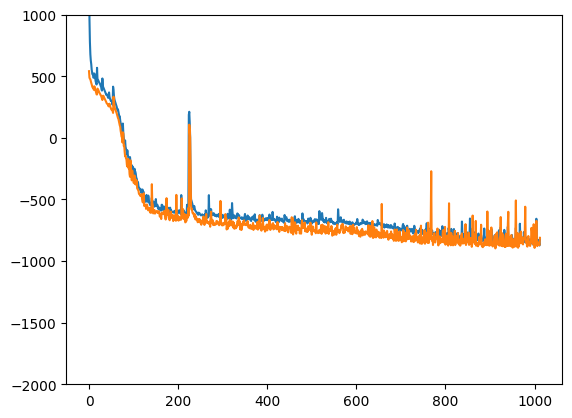

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  predict diverge [ 15.57727153 -31.60980474] [  2.21259993 -57.68988157] [2

実環境方策rollout vs Sim環境方策rollout


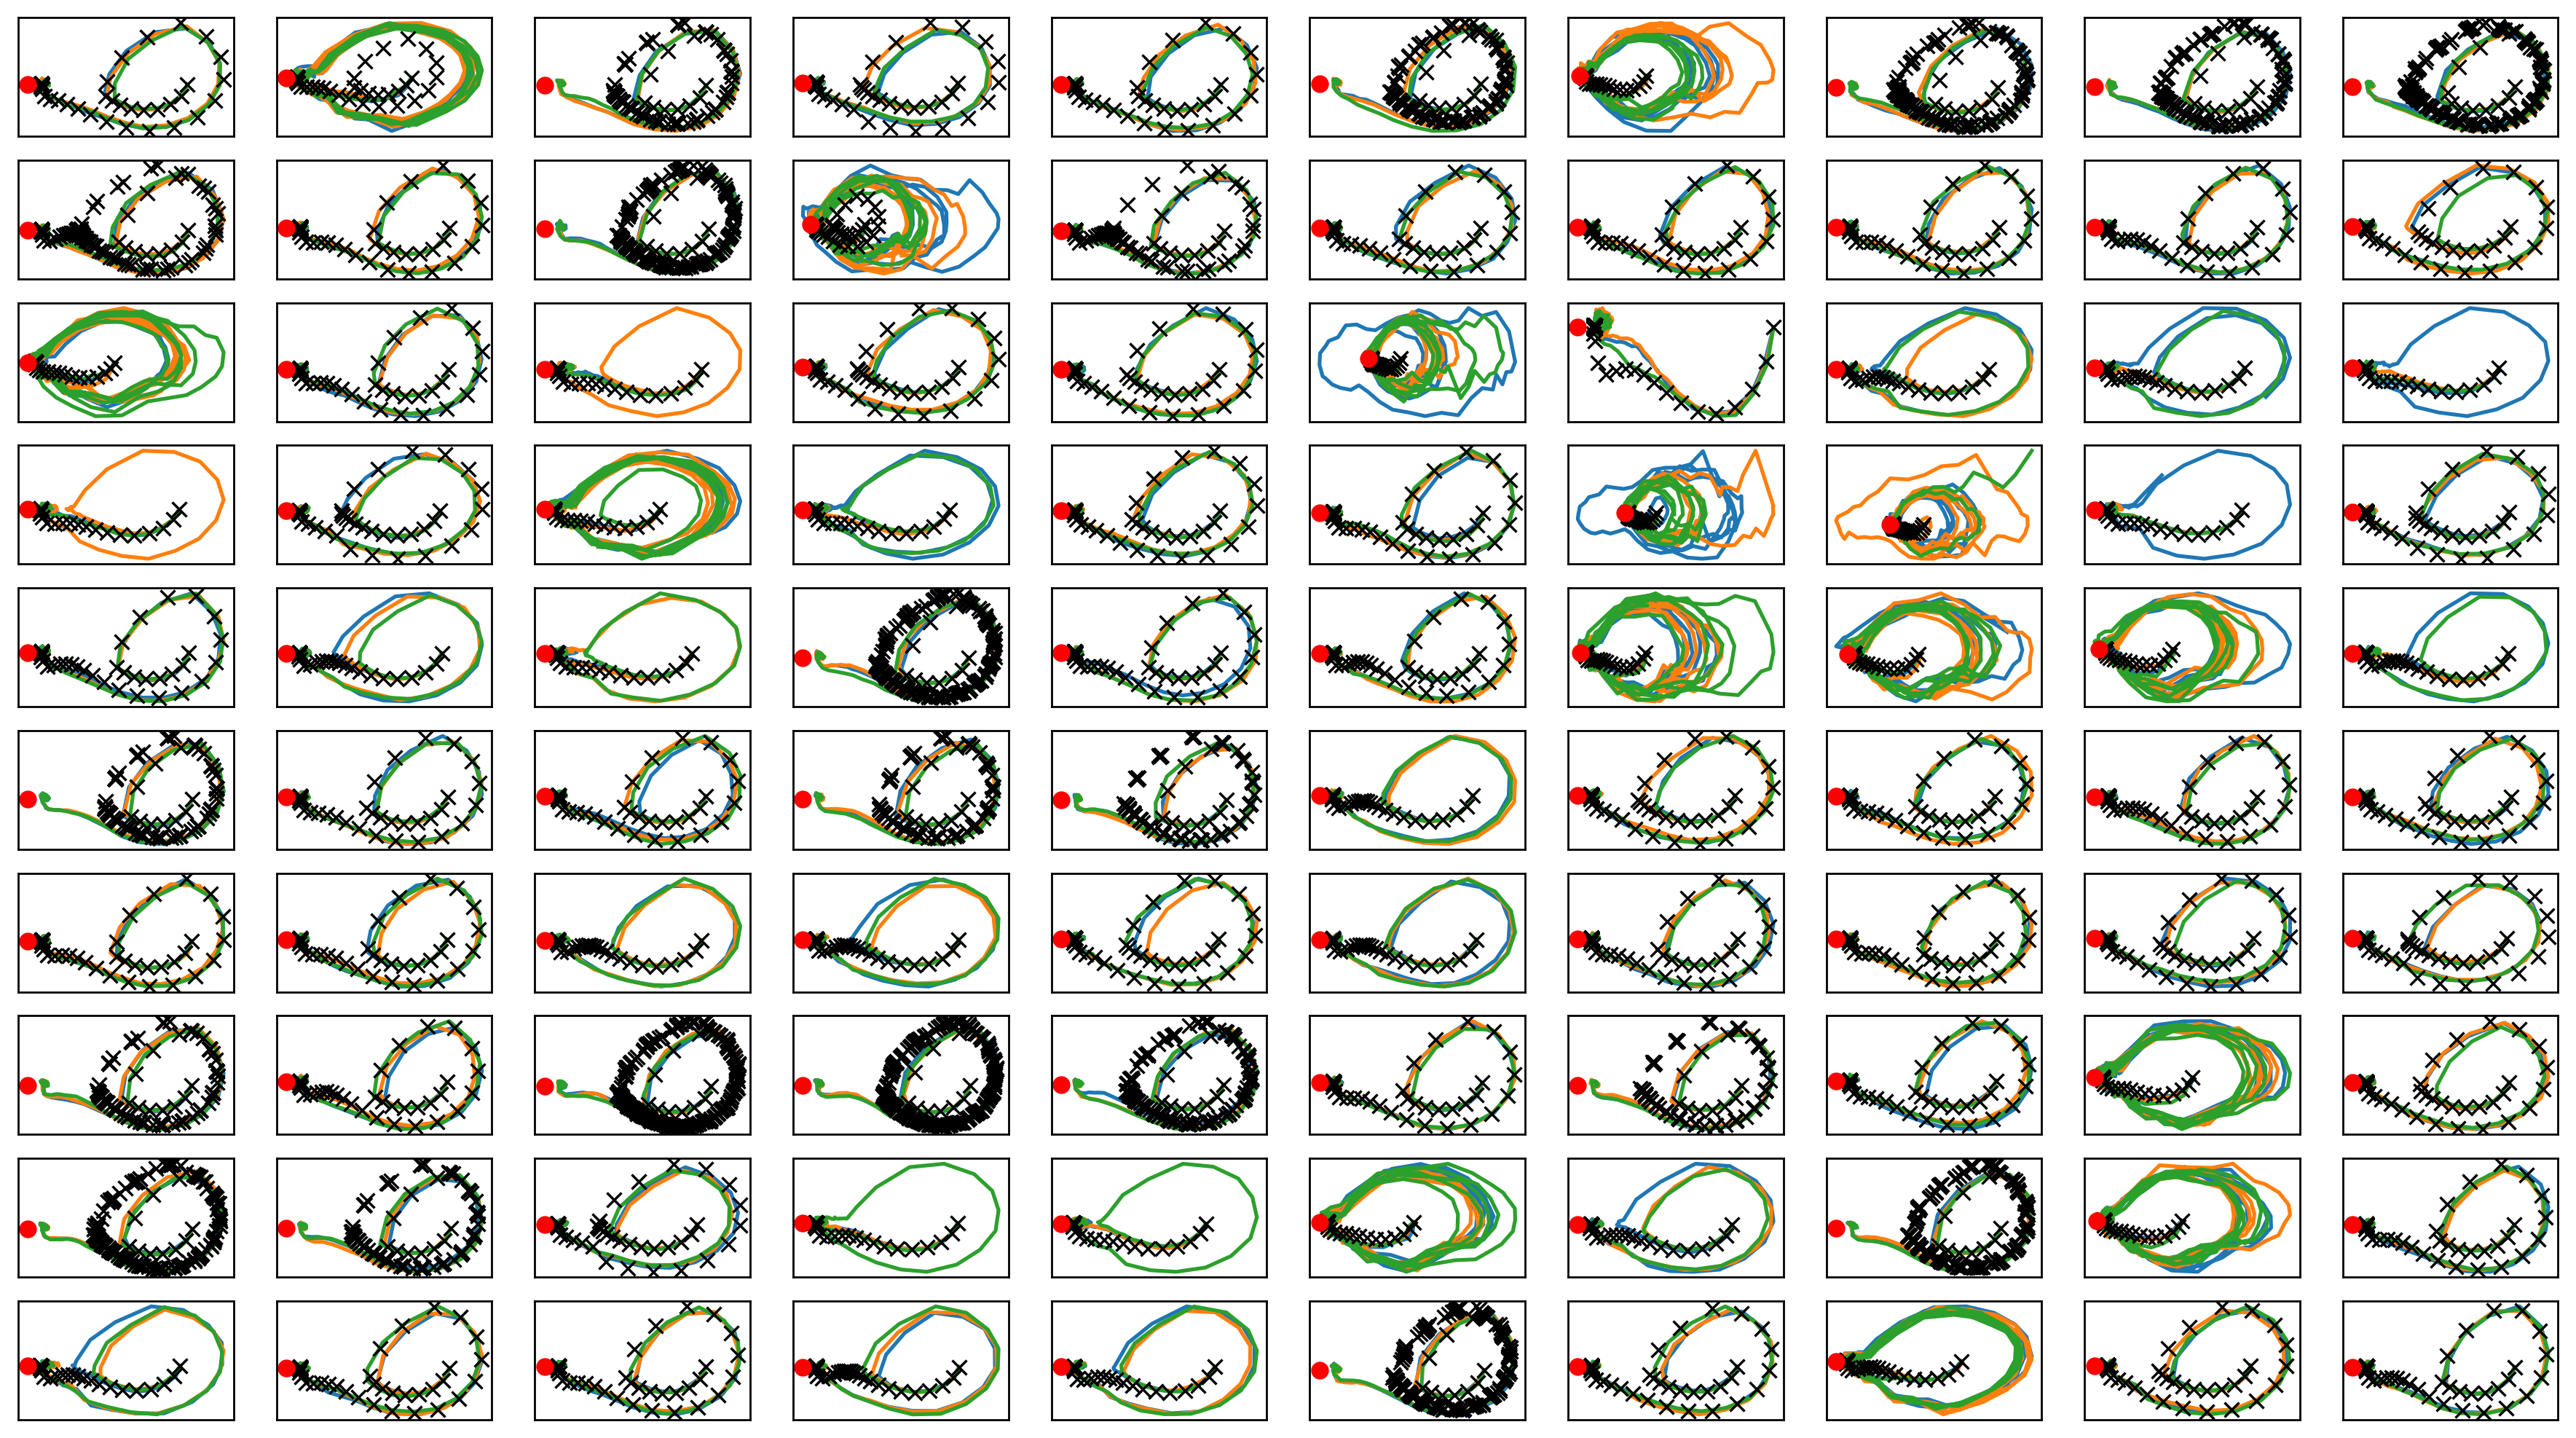

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

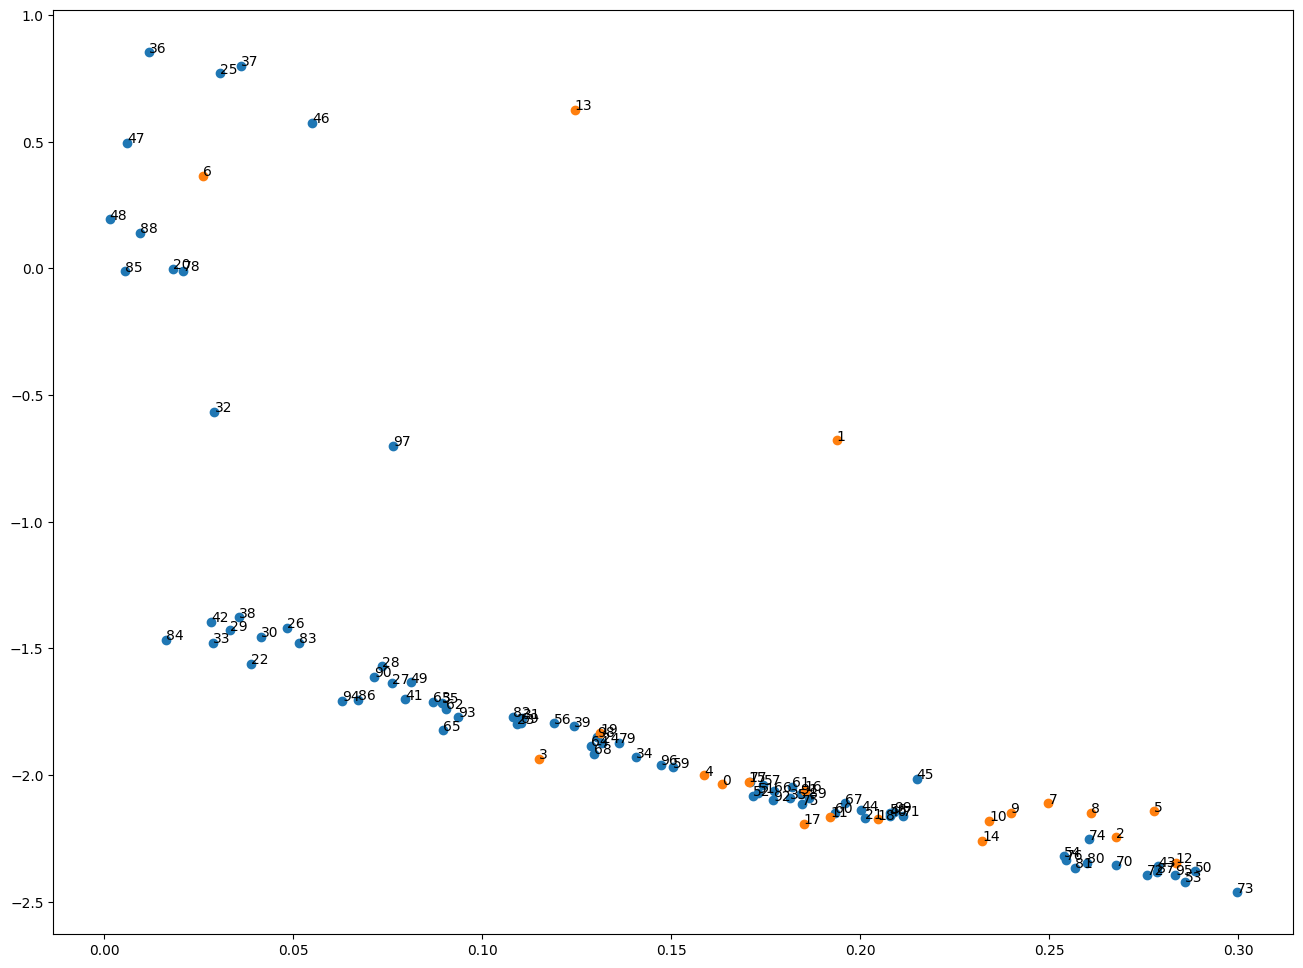

[0.16346495 0.19376823 0.2675319  0.11503246 0.15866848 0.27767899
 0.02613879 0.24978595 0.26100364 0.23974757 0.23415875 0.19197631
 0.28340068 0.12439858 0.23227011 0.17053018 0.18529065 0.1850802
 0.20454609 0.13110959 0.01806764 0.20119136 0.03867789 0.10911323
 0.13158045 0.03061344 0.04839286 0.07598748 0.07332768 0.03311254
 0.04145489 0.11061755 0.02913038 0.02882952 0.14059536 0.18145366
 0.01175634 0.03605897 0.03561832 0.1242789  0.20774164 0.07961685
 0.02818215 0.27878886 0.20022311 0.21489816 0.05495741 0.00603226
 0.00140864 0.08100239 0.28865656 0.1728472  0.17167557 0.2858247
 0.2539226  0.08923109 0.11895172 0.17438186 0.20775948 0.15039731
 0.19319706 0.18191796 0.09047245 0.08702328 0.12863061 0.0894847
 0.17726183 0.19596025 0.12942553 0.11026856 0.26757701 0.21116658
 0.27584478 0.2996541  0.26043782 0.18466787 0.25440247 0.17073022
 0.0207501  0.1360628  0.2599147  0.256741   0.10799342 0.0514889
 0.0163014  0.00555654 0.06717741 0.27842439 0.00955168 0.18644352

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


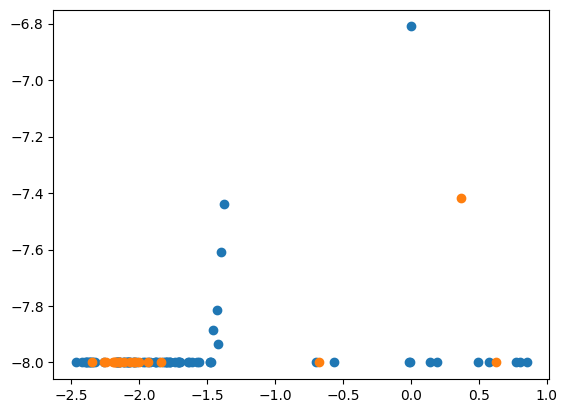

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 2.49055  validloss 2.84935±0.00000  bestvalidloss 2.84935  last_update 0
train: iter 1  trainloss 2.33218  validloss 2.66130±0.00000  bestvalidloss 2.66130  last_update 0
train: iter 2  trainloss 2.20910  validloss 2.49080±0.00000  bestvalidloss 2.49080  last_update 0
train: iter 3  trainloss 2.10520  validloss 2.35209±0.00000  bestvalidloss 2.35209  last_update 0
train: iter 4  trainloss 2.01608  validloss 2.24011±0.00000  bestvalidloss 2.24011  last_update 0
train: iter 5  trainloss 1.94187  validloss 2.14260±0.00000  bestvalidloss 2.14260  last_update 0
train: iter 6  trainloss 1.88215  validloss 2.06738±0.00000  bestvalidloss 2.06738  last_update 0
train: iter 7  trainloss 1.82791  validloss 1.99360±0.00000  bestvalidloss 1.99360  last_update 0
train: iter 8  trainloss 1.78364  validloss 1.93830±0.00000  bestvalidloss 1.93830  last_update 0
train: iter 9  trainloss 1.74435  validloss 1.89148±0.00000  bestvalidloss 1.89148  last_update 0
train: iter 10  trai

train: iter 84  trainloss 1.24610  validloss 1.26169±0.00000  bestvalidloss 1.24653  last_update 3
train: iter 85  trainloss 1.24677  validloss 1.25947±0.00000  bestvalidloss 1.24653  last_update 4
train: iter 86  trainloss 1.24447  validloss 1.25841±0.00000  bestvalidloss 1.24653  last_update 5
train: iter 87  trainloss 1.24506  validloss 1.25682±0.00000  bestvalidloss 1.24653  last_update 6
train: iter 88  trainloss 1.24128  validloss 1.24739±0.00000  bestvalidloss 1.24653  last_update 7
train: iter 89  trainloss 1.24663  validloss 1.25224±0.00000  bestvalidloss 1.24653  last_update 8
train: iter 90  trainloss 1.24739  validloss 1.25499±0.00000  bestvalidloss 1.24653  last_update 9
train: iter 91  trainloss 1.24371  validloss 1.25136±0.00000  bestvalidloss 1.24653  last_update 10
train: iter 92  trainloss 1.24492  validloss 1.24652±0.00000  bestvalidloss 1.24652  last_update 0
train: iter 93  trainloss 1.24282  validloss 1.24969±0.00000  bestvalidloss 1.24652  last_update 1
train: it

train: iter 169  trainloss 1.24624  validloss 1.24927±0.00000  bestvalidloss 1.23829  last_update 52
train: iter 170  trainloss 1.24497  validloss 1.25374±0.00000  bestvalidloss 1.23829  last_update 53
train: iter 171  trainloss 1.24457  validloss 1.24937±0.00000  bestvalidloss 1.23829  last_update 54
train: iter 172  trainloss 1.24694  validloss 1.25722±0.00000  bestvalidloss 1.23829  last_update 55
train: iter 173  trainloss 1.24101  validloss 1.25127±0.00000  bestvalidloss 1.23829  last_update 56
train: iter 174  trainloss 1.24618  validloss 1.24843±0.00000  bestvalidloss 1.23829  last_update 57
train: iter 175  trainloss 1.24322  validloss 1.25681±0.00000  bestvalidloss 1.23829  last_update 58
train: iter 176  trainloss 1.24672  validloss 1.25278±0.00000  bestvalidloss 1.23829  last_update 59
train: iter 177  trainloss 1.24194  validloss 1.24841±0.00000  bestvalidloss 1.23829  last_update 60
train: iter 178  trainloss 1.24423  validloss 1.25228±0.00000  bestvalidloss 1.23829  last_

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([-1.6170, -0.3428], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 20.80729  validloss 24.95291±0.00000  bestvalidloss 24.95291  last_update 0
train: iter 1  trainloss 12.96216  validloss 15.62500±0.00000  bestvalidloss 15.62500  last_update 0
train: iter 2  trainloss 8.59867  validloss 9.26833±0.00000  bestvalidloss 9.26833  last_update 0
train: iter 3  trainloss 7.02177  validloss 6.51766±0.00000  bestvalidloss 6.51766  last_update 0
train: iter 4  trainloss 6.41887  validloss 5.40712±0.00000  bestvalidloss 5.40712  last_update 0
train: iter 5  trainloss 5.37606  validloss 4.68788±0.00000  bestvalidloss 4.68788  last_update 0
train: iter 6  trainloss 5.26439  validloss 4.02126±0.00000  bestvalidloss 4.02126  last_update 0
train: iter 7  trainloss 4.13124  validloss 3.45695±0.00000  bestvalidloss 3.45695  last_update 0
train: iter 8  trainloss 3.72983  validloss 3.03765±0.00000  bestvalidloss 3.03765  last_update 0
train: iter 9  trainloss 3.63518  validloss 2.64628±0.00000  bestvalidloss 2.64628  last_update 0
train: iter 10

train: iter 83  trainloss 2.50648  validloss 1.48420±0.00000  bestvalidloss 1.21760  last_update 53
train: iter 84  trainloss 2.67161  validloss 1.34174±0.00000  bestvalidloss 1.21760  last_update 54
train: iter 85  trainloss 2.61140  validloss 1.38781±0.00000  bestvalidloss 1.21760  last_update 55
train: iter 86  trainloss 2.52455  validloss 1.27836±0.00000  bestvalidloss 1.21760  last_update 56
train: iter 87  trainloss 2.61857  validloss 1.30625±0.00000  bestvalidloss 1.21760  last_update 57
train: iter 88  trainloss 2.46969  validloss 1.31877±0.00000  bestvalidloss 1.21760  last_update 58
train: iter 89  trainloss 2.50511  validloss 1.57132±0.00000  bestvalidloss 1.21760  last_update 59
train: iter 90  trainloss 2.40484  validloss 1.50875±0.00000  bestvalidloss 1.21760  last_update 60
train: iter 91  trainloss 2.52346  validloss 1.70418±0.00000  bestvalidloss 1.21760  last_update 61
train: iter 92  trainloss 2.51810  validloss 1.40692±0.00000  bestvalidloss 1.21760  last_update 62


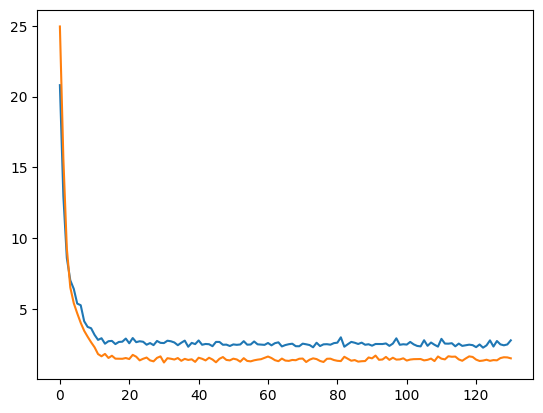

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(-1.9598)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(2.2267)


In [21]:
print(vi.h_min_tilde)

-6.1620655


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

2.860218320377655
tensor([0.5385])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

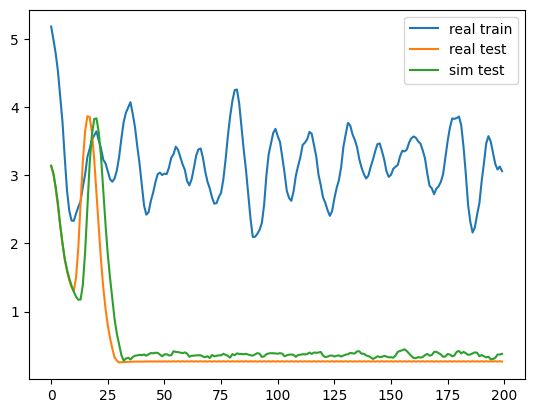

encoder [-1.8345572 -8.       ]
initial_belief tensor([-1.6170, -0.3428])
real train tensor([-1.8082, -7.9956])
real test tensor([-6.1875e-03, -6.8064e+00])
sim tensor([-1.8138, -7.9794])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-1.8163265306122454


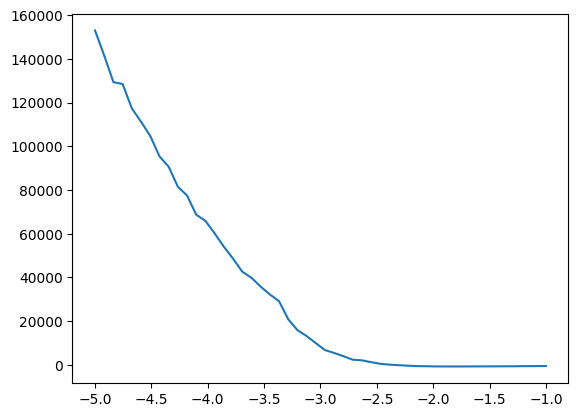

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

1.271395856652024
tensor([-1.2660])
